In [1]:
import pandas as pd
from IPython.display import display
import datetime as dt
from matplotlib import pylab
import numpy as np
import scipy as sp
import statsmodels.api as sm
import warnings 
warnings.filterwarnings("ignore")
import sqlite3

C:\Users\71104861\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
'''Import data from the Sean Lahman baseball dataset. Create initial dataframes'''


batting_data = "./data/csv_data/core/Batting.csv"
people_data = "./data/csv_data/core/People.csv"
fielding_data = "./data/csv_data/core/Fielding.csv"
franchise_data = "./data/csv_data/core/TeamsFranchises.csv"
teams_data = "./data/csv_data/core/Teams.csv"
appearances_data = "./data/csv_data/core/Appearances.csv"
park_data = "./data/csv_data/core/Parks.csv"

# include all batting columns
# include all appearances columns
# include all parks columns

people_cols = ['playerID', 'birthYear', 'birthMonth', 'nameFirst', 'nameLast', 'nameGiven', 'weight', 'height', 'bats', 'throws', 'debut', 'finalGame', 'retroID', 'bbrefID']

fielding_cols = ['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'POS', 'G', 'GS']

team_cols = ['yearID', 'lgID', 'teamID', 'franchID', 'divID', 'Rank', 'G', 'Ghome', 'W', 'L', 'park']

franch_cols = ['franchID', 'franchName', 'active']


df_batting = pd.read_csv(batting_data, header=0)
df_app = pd.read_csv(appearances_data, header=0)
df_parks = pd.read_csv(park_data, header=0)
df_people = pd.read_csv(people_data, header=0, usecols=people_cols)
df_fielding = pd.read_csv(fielding_data, header=0, usecols=fielding_cols)
df_teams = pd.read_csv(teams_data, header=0, usecols=team_cols)
df_franch = pd.read_csv(franchise_data, header=0, usecols=franch_cols)

display(df_batting.head(5))
display(df_app.head(5))
display(df_parks.head(5))
display(df_people.head(5))
display(df_fielding.head(5))
display(df_teams.head(5))
display(df_franch.head(5))

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0


,yearID,teamID,lgID,playerID,G_all,GS,G_batting,G_defense,G_p,G_c,...,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr
0,1871,TRO,NaN,abercda01,1,1.0,1,1.0,0,0,...,0,0,1,0,0,0,0,0.0,0.0,0.0
1,1871,RC1,NaN,addybo01,25,25.0,25,25.0,0,0,...,22,0,3,0,0,0,0,0.0,0.0,0.0
2,1871,CL1,NaN,allisar01,29,29.0,29,29.0,0,0,...,2,0,0,0,29,0,29,0.0,0.0,0.0
3,1871,WS3,NaN,allisdo01,27,27.0,27,27.0,0,27,...,0,0,0,0,0,0,0,0.0,0.0,0.0
4,1871,RC1,NaN,ansonca01,25,25.0,25,25.0,0,5,...,2,20,0,1,0,0,1,0.0,0.0,0.0


,park.key,park.name,park.alias,city,state,country
0,ALB01,Riverside Park,NaN,Albany,NY,US
1,ALT01,Columbia Park,NaN,Altoona,PA,US
2,ANA01,Angel Stadium of Anaheim,Edison Field; Anaheim Stadium,Anaheim,CA,US
3,ARL01,Arlington Stadium,NaN,Arlington,TX,US
4,ARL02,Rangers Ballpark in Arlington,The Ballpark in Arlington; Ameriquest Fl,Arlington,TX,US


,playerID,birthYear,birthMonth,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,Hank,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,Tommie,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,Don,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,Andy,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


,playerID,yearID,stint,teamID,lgID,POS,G,GS
0,abercda01,1871,1,TRO,NaN,SS,1,1.0
1,addybo01,1871,1,RC1,NaN,2B,22,22.0
2,addybo01,1871,1,RC1,NaN,SS,3,3.0
3,allisar01,1871,1,CL1,NaN,2B,2,0.0
4,allisar01,1871,1,CL1,NaN,OF,29,29.0


,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,park
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,South End Grounds I
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,Union Base-Ball Grounds
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,National Association Grounds
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,Hamilton Field
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,Union Grounds (Brooklyn)


,franchID,franchName,active
0,ALT,Altoona Mountain City,N
1,ANA,Los Angeles Angels of Anaheim,Y
2,ARI,Arizona Diamondbacks,Y
3,ATH,Philadelphia Athletics,N
4,ATL,Atlanta Braves,Y


In order to filter/merge the ballparks based on teams parks needs to be extended in order to account for alias name references.

In [3]:
df_park_split = df_parks['park.alias'].str.split(";", n=5, expand=True)
#display(df_park_split)

df_parks2 = df_parks.merge(df_park_split, how='left', left_index=True, right_index=True)
#display(df_parks2.head(5))

df_park_extend_0 = df_parks2[['park.key', 0, 'city', 'state', 'country']]
df_park_extend_1 = df_parks2[['park.key', 1, 'city', 'state', 'country']]
df_park_extend_2 = df_parks2[['park.key', 2, 'city', 'state', 'country']]
df_park_extend_3 = df_parks2[['park.key', 3, 'city', 'state', 'country']]

df_park_extend_0.rename(columns={0: 'park.name'}, inplace=True)
df_park_extend_1.rename(columns={1: 'park.name'}, inplace=True)
df_park_extend_2.rename(columns={2: 'park.name'}, inplace=True)
df_park_extend_3.rename(columns={3: 'park.name'}, inplace=True)

df_park_extend_0.dropna(subset=['park.name'], inplace=True)
df_park_extend_1.dropna(subset=['park.name'], inplace=True)
df_park_extend_2.dropna(subset=['park.name'], inplace=True)
df_park_extend_3.dropna(subset=['park.name'], inplace=True)

print(f"Number of parks not including alias names: {len(df_parks.index)}")

df_parks = df_parks.append(df_park_extend_0, ignore_index=True)
df_parks = df_parks.append(df_park_extend_1, ignore_index=True)
df_parks = df_parks.append(df_park_extend_2, ignore_index=True)
df_parks = df_parks.append(df_park_extend_3, ignore_index=True)

df_parks.drop_duplicates(inplace=True, ignore_index=True)

print(f"Number of parks including alias names {len(df_parks.index)}")
#display(df_parks.head(5))
#display(df_parks.tail(5))

Number of parks not including alias names: 255
Number of parks including alias names 326


Initial Constrains:
- Minimum number of at bats = 150
- Exclude Pitchers
    - players that are pitchers the majority of their games played
- Minimum debut year = 1970
    - we want the stats of a player over his full career and stats prior to this year may be missing and/or inaccurate
    - drop players with missing debut year


In [4]:
'''Calculate player experience based on their debut year'''

df_people = df_people.dropna(axis=0, subset=['debut'])

def get_year(cell):

    if isinstance(cell, str):
        debut_dt = dt.datetime.strptime(cell, "%Y-%m-%d")
        return debut_dt.year 
    
    return np.nan

def get_month(cell):

    if isinstance(cell, str):
        final_dt = dt.datetime.strptime(cell, "%Y-%m-%d")
        return final_dt.month
    
    return np.nan

df_people['debut_yr'] = df_people['debut'].apply(get_year)

print(len(df_people.index))
df_people = df_people[df_people['debut_yr'] > 1970]
print(len(df_people.index))

df_people['final_month'] = df_people['finalGame'].apply(get_month)
df_people['final_yr'] = df_people['finalGame'].apply(get_year)
df_people['final_yr_adj'] = np.where(df_people['final_month'] < 5, df_people['final_yr'] - 1, df_people['final_yr'])
df_people['seasons_exp'] = df_people['final_yr_adj'] - df_people['debut_yr']

print(len(df_people.index)) # shouldn't change

19892
9193
9193


Get actual number of seasons played and check if a player missed any seasons.
This captures any missing seasons, regardless of reason (injuries, time off, or our exclusion critieria)

In [5]:
batting_seasons = df_batting[['playerID', 'yearID']]
season_count = batting_seasons.groupby(['playerID'])['yearID'].count()
season_count = season_count.to_frame().reset_index().rename(columns={'yearID': 'seasons_act'})
display(season_count.head())

df_people = df_people.merge(season_count, how='left', on='playerID')
df_people.dropna(subset=['seasons_act'], inplace=True) # don't need to do this if I do inner merge
df_people['missed_any'] = np.where(df_people['seasons_exp'] != df_people['seasons_act'], 1, 0)

print(len(df_people.index))
display(df_people.head())

,playerID,seasons_act
0,aardsda01,9
1,aaronha01,23
2,aaronto01,7
3,aasedo01,13
4,abadan01,3


9192


,playerID,birthYear,birthMonth,nameFirst,nameLast,nameGiven,weight,height,bats,throws,...,finalGame,retroID,bbrefID,debut_yr,final_month,final_yr,final_yr_adj,seasons_exp,seasons_act,missed_any
0,aardsda01,1981.0,12.0,David,Aardsma,David Allan,215.0,75.0,R,R,...,2015-08-23,aardd001,aardsda01,2004,8,2015,2015,11,9.0,1
1,aasedo01,1954.0,9.0,Don,Aase,Donald William,190.0,75.0,R,R,...,1990-10-03,aased001,aasedo01,1977,10,1990,1990,13,13.0,0
2,abadan01,1972.0,8.0,Andy,Abad,Fausto Andres,184.0,73.0,L,L,...,2006-04-13,abada001,abadan01,2001,4,2006,2005,4,3.0,1
3,abadfe01,1985.0,12.0,Fernando,Abad,Fernando Antonio,235.0,74.0,L,L,...,2019-09-28,abadf001,abadfe01,2010,9,2019,2019,9,10.0,1
4,abbotgl01,1951.0,2.0,Glenn,Abbott,William Glenn,200.0,78.0,R,R,...,1984-08-08,abbog001,abbotgl01,1973,8,1984,1984,11,12.0,1


Identify player's primary position and filter out pitchers.

In [6]:
# identify player by primary position
df_pos = df_fielding.groupby(['playerID', 'POS'])['G'].count()
df_pos = df_pos.unstack()

pos_cols = ['1B', '2B', '3B', 'C', 'OF', 'P', 'SS']

def get_main_pos(row):
    # return col name for max pos
    max_col_val = 0
    max_col = ''
    for col in pos_cols:
        if row[col] > max_col_val:
            max_col = col

    return max_col

df_pos['p_pos'] = df_pos.apply(get_main_pos, axis=1) 
df_pos.reset_index(inplace=True)
df_pos = df_pos[['playerID', 'p_pos']]
df_pos = df_pos.rename_axis(None, axis=1)
#display(df_pos.head(5))
print(len(df_people.index))
df_people = df_people.merge(df_pos, how='inner', on='playerID')
df_people = df_people[df_people['p_pos'] != 'P']
print(len(df_people.index))

9192
4096


In [7]:
debut_filter = df_people[['playerID']]

print(f"Batting start count: {len(df_batting.index)}")
print(f"Appearance start cound: {len(df_app.index)}")
print(f"Parks start count: {len(df_parks.index)}")
print(f"Fielding start count: {len(df_fielding.index)}")
print(f"Teams start count: {len(df_teams.index)}")
print(f"Franchise start count: {len(df_franch.index)}")

# Filter the remaining dataframes to include restricted player sample
df_batting = df_batting.merge(debut_filter, how='inner', on='playerID') 
df_app = df_app.merge(debut_filter, how='inner', on='playerID') 
df_fielding = df_fielding.merge(debut_filter, how='inner', on='playerID')

# Teams can be filtered by yearID
df_teams = df_teams[df_teams['yearID'] >= 1970]

# Parks can be filtered by remaining parks from filtered teams
park_filter = df_teams[['park']]
df_parks = df_parks.merge(park_filter, how='inner', left_on='park.name', right_on='park')

# Franchises can be filtered by remaining franchID from filtered teams
franch_filter = df_teams[['franchID']]
df_franch = df_franch.merge(franch_filter, how='inner', on='franchID')

df_batting.drop_duplicates(inplace=True, ignore_index=True)
df_app.drop_duplicates(inplace=True, ignore_index=True)
df_fielding.drop_duplicates(inplace=True, ignore_index=True)
df_teams.drop_duplicates(inplace=True, ignore_index=True)
df_parks.drop_duplicates(inplace=True, ignore_index=True)
df_franch.drop_duplicates(inplace=True, ignore_index=True)


print("\n ---------- \n")
print(f"Batting end count: {len(df_batting.index)}")
print(f"Appearance end count: {len(df_app.index)}")
print(f"Parks end count: {len(df_parks.index)}")
print(f"Fielding end count: {len(df_fielding.index)}")
print(f"Teams end count: {len(df_teams.index)}")
print(f"Franchise end count: {len(df_franch.index)}")

Batting start count: 108789
Appearance start cound: 108717
Parks start count: 326
Fielding start count: 144768
Teams start count: 2955
Franchise start count: 120

 ---------- 

Batting end count: 26665
Appearance end count: 26652
Parks end count: 61
Fielding end count: 42100
Teams end count: 1414
Franchise end count: 30


In [8]:
# Only include instances where a player had at least the minimum number of at bats
ab_min = 150
df_batting = df_batting[df_batting.AB >= ab_min]
print(f"Final count of batting instances: {len(df_batting.index)}")

Final count of batting instances: 14224


Calculate TB, OBP, SLG, and OPS

In [9]:
df_batting['1B'] = df_batting['H'] - (df_batting['2B'] + df_batting['3B'] + df_batting['HR'])
df_batting['TB'] = df_batting['1B'] + (df_batting['2B'] * 2) + (df_batting['3B'] * 3) + (df_batting['HR'] * 4)
df_batting['obp'] = (df_batting.H + df_batting.BB + df_batting.HBP) / (df_batting.AB + df_batting.BB + df_batting.SF + df_batting.HBP)
df_batting['slg'] = df_batting.TB / df_batting.AB
df_batting['ops'] = df_batting['obp'] + df_batting['slg']

Identify if a player bats and throws with the same hand (bt_same)

In [10]:
df_people['bt_same'] = np.where(df_people['bats'] == df_people['throws'], 1, 0)

Calculate Players Age and years of experience (yoe)

In [11]:
df_birth_years = df_people[['playerID','birthYear', 'final_yr_adj', 'debut_yr', 'missed_any', 'bt_same', 'p_pos', 'height', 'weight']]

df_main = df_batting.merge(df_birth_years, how='inner', on='playerID')
df_main['age'] = df_main['yearID'] - df_main['birthYear']
df_main['yoe'] = df_main['yearID'] - df_main['debut_yr']

df_main.drop(columns=['birthYear'], inplace=True)
print(len(df_main.index))
display(df_main.head())

14224


,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,ops,final_yr_adj,debut_yr,missed_any,bt_same,p_pos,height,weight,age,yoe
0,arnolch01,1974,1,SFN,NL,78,174,22,42,7,...,0.635417,1976,1971,1,1,SS,70.0,160.0,27.0,3
1,auerbri01,1971,1,ML4,AL,79,236,22,48,10,...,0.529792,1981,1971,1,1,SS,72.0,165.0,21.0,0
2,auerbri01,1972,1,ML4,AL,153,554,50,121,16,...,0.545620,1981,1971,1,1,SS,72.0,165.0,22.0,1
3,auerbri01,1975,1,LAN,NL,85,170,18,38,9,...,0.574343,1981,1971,1,1,SS,72.0,165.0,25.0,4
4,beniqju01,1974,1,BOS,AL,106,389,60,104,14,...,0.669826,1988,1971,1,1,SS,71.0,150.0,24.0,3


Calculate adjusted years of experience (yoe_adj).
you_adj is the numbers of years a player has been included in our data.
i.e. only count seasons they played and had at least X number of at bats.

In [12]:
df_start_end = df_main[['playerID', 'yearID', 'debut_yr', 'final_yr_adj', 'yoe']]
df_start_end.sort_values(by=['yearID'], inplace=True)


player_careers = {}
count = 0

for ind, row in df_start_end.iterrows():

    if row['playerID'] not in player_careers:
        player_careers[row['playerID']] = {}

    player_careers[row['playerID']]['exp_career'] = [x for x in range(row['debut_yr'], row['final_yr_adj'] + 1)]
    
    if 'act_career' not in player_careers[row['playerID']].keys():
        player_careers[row['playerID']]['act_career'] = []

    player_careers[row['playerID']]['act_career'].append(row['yearID'])

missed_years = {}
for player in player_careers:
    exp_years = set(player_careers[player]['exp_career'])
    act_years = set(player_careers[player]['act_career'])

    if exp_years != act_years:
        missed_years[player] = [int(x) for x in exp_years.difference(act_years)]



df_sub_main = df_main[['playerID','yearID','yoe']]

for index, row in df_main.iterrows():
    player = row['playerID']
    yearID = row['yearID']
    yoe_adj = row['yoe']

    if player in missed_years:
        
        for year in missed_years[player]:
            if yearID > year:
                yoe_adj -= 1
    
    df_sub_main['yoe'].iloc[index] = yoe_adj


df_sub_main.rename(columns={'yoe': 'yoe_adj'}, inplace=True)
df_main = df_main.merge(df_sub_main, how='inner', on=['playerID','yearID'])


#display(df_start_end.head())
#display(df_start_end[df_start_end['playerID'] == 'stennre01'])
#print(player_careers['stennre01']) # missed his last season based on our criteria (only 87 AB's his last season)
# however, the only other year that was close to the threshold was his first year (153 AB's)
# all other seasons were > 300 AB's with 3 seasons over 600 AB's...
# maybe consider averaging a players AB's and if they meet that criteria then we count all their years...
print(missed_years['auerbri01'])
display(df_sub_main[df_sub_main['playerID'] == 'auerbri01'])
display(df_main[df_main['playerID'] == 'auerbri01'])

[1973, 1974, 1976, 1977, 1978, 1979, 1980, 1981]


,playerID,yearID,yoe_adj
1,auerbri01,1971,0
2,auerbri01,1972,1
3,auerbri01,1975,2


,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,final_yr_adj,debut_yr,missed_any,bt_same,p_pos,height,weight,age,yoe,yoe_adj
1,auerbri01,1971,1,ML4,AL,79,236,22,48,10,...,1981,1971,1,1,SS,72.0,165.0,21.0,0,0
2,auerbri01,1972,1,ML4,AL,153,554,50,121,16,...,1981,1971,1,1,SS,72.0,165.0,22.0,1,1
3,auerbri01,1975,1,LAN,NL,85,170,18,38,9,...,1981,1971,1,1,SS,72.0,165.0,25.0,4,2


classify breakout seasons and classify if a player ever has a breakout season

In [13]:
df_main['ops_per_delta'] = df_main['ops'].pct_change(periods=1, fill_method='ffill')
df_main.dropna(subset=['ops_per_delta'], inplace=True)

df_post_debut = df_main[df_main['yoe_adj'] > 0]
#df_post_debut['ops_per_delta'].describe([.5, .75, .8, .9, .95])
df_main['bo_season'] = np.where( (df_main['ops_per_delta'] >= .175) & (df_main['yoe_adj'] > 0), 1, 0)
#display(df_main[df_main['bo_season'] == 1]) #1178 instance

breakout_players = df_main[df_main['bo_season'] == 1]
breakout_players = breakout_players[['playerID', 'bo_season']]
breakout_players.rename(columns={'bo_season': 'bo_ever'}, inplace=True)

df_main = df_main.merge(breakout_players, how='left', on='playerID')
df_main['bo_ever'].fillna(0, inplace=True)
display(df_main.head())

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,bt_same,p_pos,height,weight,age,yoe,yoe_adj,ops_per_delta,bo_season,bo_ever
0,auerbri01,1971,1,ML4,AL,79,236,22,48,10,...,1,SS,72.0,165.0,21.0,0,0,-0.166228,0,0.0
1,auerbri01,1972,1,ML4,AL,153,554,50,121,16,...,1,SS,72.0,165.0,22.0,1,1,0.029875,0,0.0
2,auerbri01,1975,1,LAN,NL,85,170,18,38,9,...,1,SS,72.0,165.0,25.0,4,2,0.052643,0,0.0
3,beniqju01,1974,1,BOS,AL,106,389,60,104,14,...,1,SS,71.0,150.0,24.0,3,0,0.166248,0,1.0
4,beniqju01,1974,1,BOS,AL,106,389,60,104,14,...,1,SS,71.0,150.0,24.0,3,0,0.166248,0,1.0


In [14]:
df_main['bo_ever'] = df_main['bo_ever'].astype('int32')
df_main['age'] = df_main['age'].astype('int32')

df_main.dtypes

playerID          object
yearID             int64
stint              int64
teamID            object
lgID              object
G                  int64
AB                 int64
R                  int64
H                  int64
2B                 int64
3B                 int64
HR                 int64
RBI              float64
SB               float64
CS               float64
BB                 int64
SO               float64
IBB              float64
HBP              float64
SH               float64
SF               float64
GIDP             float64
1B                 int64
TB                 int64
obp              float64
slg              float64
ops              float64
final_yr_adj       int64
debut_yr           int64
missed_any         int32
bt_same            int32
p_pos             object
height           float64
weight           float64
age                int32
yoe                int64
yoe_adj            int64
ops_per_delta    float64
bo_season          int32
bo_ever            int32


Arbitrary Column formatting

In [15]:
# Batting cols float to int
batting_ints = {'RBI':'int32', 'SB':'int32', 'CS':'int32', 'SO':'int32', 'IBB':'int32', 'HBP':'int32', 'SH':'int32', 'SF':'int32', 'GIDP':'int32'}

app_ints = {'GS':'int32', 'G_defense':'int32', 'G_dh':'int32', 'G_ph':'int32', 'G_pr':'int32'}

fielding_ints = {'GS':'int32'}

# leaving weight and height as floats
people_ints = {'birthYear':'int32', 'birthMonth':'int32'}

team_ints = {'Ghome':'int32'}

df_main = df_main.astype(batting_ints)
df_batting = df_batting.astype(batting_ints)
df_app = df_app.astype(app_ints)
df_fielding = df_fielding.astype(fielding_ints)
df_people = df_people.astype(people_ints)
df_teams = df_teams.astype(team_ints)

Write to csv files

In [16]:
df_batting.to_csv("./data/cleaned_data/batting_clean.csv" , index=False)
df_app.to_csv("./data/cleaned_data/appearance_clean.csv" , index=False)
df_people.to_csv("./data/cleaned_data/people_clean.csv", index=False)
df_fielding.to_csv("./data/cleaned_data/fielding_clean.csv" , index=False)
df_teams.to_csv("./data/cleaned_data/teams_clean.csv", index=False)
df_parks.to_csv("./data/cleaned_data/parks_clean.csv", index=False)
df_franch.to_csv("./data/cleaned_data/franch_clean.csv", index=False)
df_main.to_csv("./data/cleaned_data/main_clean.csv", index=False)

Write to sqlite db

In [17]:
con = sqlite3.connect('./data/cleaned_data/cleaned_data.db')

df_batting.to_sql("batting_clean", con, index=False, if_exists='replace')
df_app.to_sql("appearance_clean", con,  index=False, if_exists='replace')
df_people.to_sql("people_clean", con, index=False, if_exists='replace')
df_fielding.to_sql("fielding_clean", con, index=False, if_exists='replace')
df_teams.to_sql("teams_clean", con, index=False, if_exists='replace')
df_parks.to_sql("parks_clean", con, index=False, if_exists='replace')
df_franch.to_sql("franch_clean", con, index=False, if_exists='replace')
df_main.to_sql("main_clean", con, index=False, if_exists='replace')

con.commit()
con.close()

In [18]:
df_main.columns

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
       'SF', 'GIDP', '1B', 'TB', 'obp', 'slg', 'ops', 'final_yr_adj',
       'debut_yr', 'missed_any', 'bt_same', 'p_pos', 'height', 'weight', 'age',
       'yoe', 'yoe_adj', 'ops_per_delta', 'bo_season', 'bo_ever'],
      dtype='object')

In [19]:
df_new_main = df_main[['playerID', 'yearID', 'lgID', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
       'SF', 'GIDP', '1B', 'TB', 'obp', 'slg', 'ops', 
        'missed_any', 'bt_same', 'p_pos', 'height', 'weight', 'age',
       'yoe', 'yoe_adj', 'ops_per_delta', 'bo_season', 'bo_ever']].copy()

In [20]:
Breakout_Players = df_new_main[df_new_main['bo_ever'] == 1].copy()

In [21]:
Breakout_Seasons = df_new_main[df_new_main['bo_season']==1].copy()
Breakout_Seasons.sort_values(['playerID', 'yearID'], ascending=True, inplace=True)

Breakout_Seasons = Breakout_Seasons[['playerID', 'yearID']]
Breakout_Seasons.drop_duplicates(subset=['playerID'], keep='first', inplace=True)
Breakout_Seasons_Map = pd.Series(Breakout_Seasons['yearID'].values, index=Breakout_Seasons['playerID']).to_dict()


In [22]:
Breakout_Players_NoBS = Breakout_Players.copy()

for item in Breakout_Seasons_Map.items():
    Breakout_Players_NoBS = Breakout_Players_NoBS.drop(Breakout_Players_NoBS[(Breakout_Players_NoBS['playerID'] == item[0]) & (Breakout_Players_NoBS['yearID'] >= item[1])].index)
    

In [23]:
'''Concat Breakout_Players_NoBS with no breakout players'''
Non_Breakout_Players = df_new_main[df_new_main['bo_ever']==0].copy()
first_breakout_training = pd.concat([Breakout_Players_NoBS, Non_Breakout_Players])

In [24]:
first_breakout_training.to_csv("./data/cleaned_data/first_breakout_training.csv", index=False)

In [25]:
'''Filter out ages 30+ because imbalanced datasets. Most first breakouts occur in mid/late twenties'''
first_breakout_training = first_breakout_training[first_breakout_training['age'] < 30].copy()
first_breakout_training_avg = first_breakout_training.copy()

In [26]:
'''Convert position strings to integers. Scikit learn requires quantitative predictors'''
from sklearn import preprocessing
pos_list = list(set(first_breakout_training['p_pos']))
le = preprocessing.LabelEncoder()
le.fit(pos_list)

LabelEncoder()

In [27]:
list(le.inverse_transform([0,1,2,3,4,5]))

['1B', '2B', '3B', 'C', 'OF', 'SS']

In [28]:
first_breakout_training.drop_duplicates(inplace=True)
df_new_main.drop_duplicates(inplace=True)

In [29]:
first_breakout_training['p_pos'] = le.transform(first_breakout_training['p_pos'])
first_breakout_training['lgID'].replace('AL', 0, inplace=True)
first_breakout_training['lgID'].replace('NL', 1, inplace=True)

In [30]:
print(first_breakout_training.head())

     playerID  yearID  lgID    G   AB   R    H  2B  3B  HR  ...  bt_same  \
3   beniqju01    1974     0  106  389  60  104  14   3   5  ...        1   
5   beniqju01    1975     0   78  254  43   74  14   4   2  ...        1   
7   beniqju01    1976     0  145  478  49  122  14   4   0  ...        1   
34  braunst01    1971     0  128  343  51   87  12   2   5  ...        0   
35  braunst01    1972     0  121  402  40  116  21   0   2  ...        0   

    p_pos  height  weight  age  yoe  yoe_adj  ops_per_delta  bo_season  \
3       5    71.0   150.0   24    3        0       0.166248          0   
5       5    71.0   150.0   25    4        1       0.134220          0   
7       5    71.0   150.0   26    5        2      -0.189141          0   
34      5    70.0   180.0   23    0        0       0.072807          0   
35      5    70.0   180.0   24    1        1       0.031010          0   

    bo_ever  
3         1  
5         1  
7         1  
34        1  
35        1  

[5 rows x 36 

In [31]:
'''Drop playerID col'''
first_breakout_training.drop(['playerID'], axis=1, inplace=True)
first_breakout_training.drop(['bo_season'], axis=1, inplace=True)

In [32]:
x_data = first_breakout_training.iloc[:, :-1]
y_data = first_breakout_training[['bo_ever']].copy()

In [65]:
'''Create training data and test data dataframes for the logistic regression model. Leave out 25% of data as the test set'''
from sklearn.model_selection import train_test_split
#x_data = x_data[test1].copy()
x_train, x_test, y_train, y_test = train_test_split(x_data[test2], y_data, test_size=0.25, random_state=100)
y_train = np.array(y_train).ravel()
y_test = np.array(y_test).ravel()

In [66]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1700, 7)
(567, 7)
(1700,)
(567,)


In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#scaler.fit(data)
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.fit_transform(x_test)

In [68]:
from sklearn.linear_model import LogisticRegression
#https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()
logisticRegr.fit(scaled_x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
predictions = logisticRegr.predict(scaled_x_test)
score = logisticRegr.score(scaled_x_test, y_test)
print(score)

0.6754850088183422


In [70]:
'''https://machinelearningmastery.com/calculate-feature-importance-with-python/'''
importance = logisticRegr.coef_[0]
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -0.34442
Feature: 1, Score: 0.27838
Feature: 2, Score: 0.47648
Feature: 3, Score: -0.60272
Feature: 4, Score: 0.15543
Feature: 5, Score: 0.26108
Feature: 6, Score: -0.57557


Index(['yearID', 'BB', 'TB', 'ops', 'p_pos', 'weight', 'age'], dtype='object')


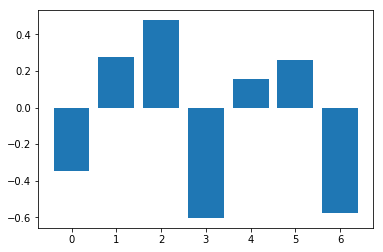

In [71]:
from matplotlib import pyplot
print(x_train.columns)
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [72]:
'''Function to test various combinations of data fields'''
def log_model_score(x_data, y_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25, random_state=100)
    y_train = np.array(y_train).ravel()
    y_test = np.array(y_test).ravel()
    scaler = StandardScaler()
    #scaler.fit(data)
    scaled_x_train = scaler.fit_transform(x_train)
    scaled_x_test = scaler.fit_transform(x_test)
    logisticRegr = LogisticRegression()
    logisticRegr.fit(scaled_x_train, y_train)
    score = logisticRegr.score(scaled_x_test, y_test)
    return score

In [73]:
x_data.columns

Index(['yearID', 'lgID', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB',
       'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP', '1B', 'TB', 'obp',
       'slg', 'ops', 'missed_any', 'bt_same', 'p_pos', 'height', 'weight',
       'age', 'yoe', 'yoe_adj', 'ops_per_delta'],
      dtype='object')

In [74]:
test1 = ['yearID', 'R', 'H', 'RBI', 'SB',
       'BB', 'SO', 'p_pos', 'weight', 'age']

test2 = ['yearID', 'R', 'H', 'RBI', 'SB',
       'BB', 'SO', 'p_pos', 'weight',
       'age']

test3 = ['yearID', 'R', 'TB', 'RBI', 'SB',
       'BB', 'SO', 'p_pos', 'weight',
       'age']

In [75]:
log_model_score(x_data[test1], y_data)


0.6578483245149912

In [76]:
log_model_score(x_data[test2], y_data)


0.6578483245149912

In [77]:
log_model_score(x_data[test3], y_data)

0.654320987654321

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [79]:
calc_vif(x_data[test3])

,variables,VIF
0,yearID,369.654920
1,R,100.248551
2,TB,161.353192
3,RBI,56.050225
4,SB,3.577011
5,BB,12.540711
6,SO,12.860873
7,p_pos,19.676442
8,weight,127.168414
9,age,207.271649


In [80]:
'''Calculate avgs across all seasons....avg change across seasons? 
Then only one row as player features and breakout vs. not
Avg yearly change in TB, OPS, OBP, SLG. Height, weight. Position. 
Avg H, TB, OPS (not yearly change)'''

'Calculate avgs across all seasons....avg change across seasons? \nThen only one row as player features and breakout vs. not\nAvg yearly change in TB, OPS, OBP, SLG. Height, weight. Position. \nAvg H, TB, OPS (not yearly change)'

In [81]:
first_breakout_training_avg.columns

Index(['playerID', 'yearID', 'lgID', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR',
       'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP', '1B',
       'TB', 'obp', 'slg', 'ops', 'missed_any', 'bt_same', 'p_pos', 'height',
       'weight', 'age', 'yoe', 'yoe_adj', 'ops_per_delta', 'bo_season',
       'bo_ever'],
      dtype='object')

In [82]:
pos_list = list(set(first_breakout_training_avg['p_pos']))
le = preprocessing.LabelEncoder()
le.fit(pos_list)
list(le.inverse_transform([0,1,2,3,4,5]))

[0, 1, 2, 3, 4, 5]

In [83]:
first_breakout_training_avg.drop_duplicates(inplace=True)
first_breakout_training_avg['p_pos'] = le.transform(first_breakout_training_avg['p_pos'])
first_breakout_training_avg['lgID'].replace('AL', 0, inplace=True)
first_breakout_training_avg['lgID'].replace('NL', 1, inplace=True)

In [141]:
training_avg_groupby = first_breakout_training_avg.groupby(['playerID'])['yearID', 'lgID', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR',
       'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP', '1B',
       'TB', 'obp', 'slg', 'ops', 'missed_any', 'bt_same', 'p_pos', 'height',
       'weight', 'age', 'yoe', 'yoe_adj', 'ops_per_delta', 'bo_ever'].mean()

In [142]:
print(training_avg_groupby.head())

           yearID  lgID      G      AB      R      H     2B    3B    HR   RBI  \
playerID                                                                        
abbotje01  1999.0   0.0   84.5  229.50  32.00  63.50  14.50  1.00   7.5  35.0   
abbotku01  1995.5   1.0  106.0  334.25  43.25  85.75  17.75  4.75  10.0  39.0   
abercre01  2006.0   1.0  111.0  255.00  39.00  54.00  12.00  2.00   5.0  24.0   
abernbr01  2001.5   0.0   98.0  383.50  44.50  97.00  17.50  2.50   3.5  36.5   
abnersh01  1991.0   0.5   94.0  196.00  19.00  51.50   9.50  0.50   1.0  15.5   

           ...  missed_any  bt_same  p_pos  height  weight   age  yoe  \
playerID   ...                                                          
abbotje01  ...         1.0      0.0    4.0    74.0   190.0  27.0  2.0   
abbotku01  ...         1.0      1.0    5.0    71.0   180.0  26.5  2.5   
abercre01  ...         1.0      1.0    4.0    75.0   215.0  26.0  0.0   
abernbr01  ...         1.0      1.0    4.0    73.0   185.0  24.5  0

In [143]:
training_avg_groupby = training_avg_groupby.reset_index()

In [144]:
print(training_avg_groupby.head())

    playerID  yearID  lgID      G      AB      R      H     2B    3B    HR  \
0  abbotje01  1999.0   0.0   84.5  229.50  32.00  63.50  14.50  1.00   7.5   
1  abbotku01  1995.5   1.0  106.0  334.25  43.25  85.75  17.75  4.75  10.0   
2  abercre01  2006.0   1.0  111.0  255.00  39.00  54.00  12.00  2.00   5.0   
3  abernbr01  2001.5   0.0   98.0  383.50  44.50  97.00  17.50  2.50   3.5   
4  abnersh01  1991.0   0.5   94.0  196.00  19.00  51.50   9.50  0.50   1.0   

   ...  missed_any  bt_same  p_pos  height  weight   age  yoe  yoe_adj  \
0  ...         1.0      0.0    4.0    74.0   190.0  27.0  2.0      0.5   
1  ...         1.0      1.0    5.0    71.0   180.0  26.5  2.5      1.5   
2  ...         1.0      1.0    4.0    75.0   215.0  26.0  0.0      0.0   
3  ...         1.0      1.0    4.0    73.0   185.0  24.5  0.5      0.5   
4  ...         1.0      1.0    4.0    73.0   190.0  25.0  4.0      0.5   

   ops_per_delta  bo_ever  
0      -0.035417      0.0  
1       0.008364      0.0  
2 

In [145]:
'''Drop playerID col'''
training_avg_groupby2 = training_avg_groupby.copy()
training_avg_groupby.drop(['playerID'], axis=1, inplace=True)


In [89]:
x_data = training_avg_groupby.iloc[:, :-1]
y_data = training_avg_groupby[['bo_ever']].copy()

In [90]:
log_model_score(x_data, y_data)


0.6807760141093474

In [91]:
'''The best features was test2 with a 67.5%. I chose a slightly lower accuracy than other models since it had fewer predictors'''

test1 = ['yearID', 'H', 'HR',
       'BB', 'p_pos', 'ops_per_delta', 'weight', 'age']

test2 = ['yearID', 'BB',
       'TB', 'ops', 'p_pos',
       'weight', 'age']

test3 = ['yearID', 'lgID', 'AB', 'R', 'H', 'HR',
       'RBI', 'BB',
       'TB', 'p_pos',
       'weight', 'age', 'ops_per_delta']

In [92]:
log_model_score(x_data[test1], y_data)


0.6578483245149912

In [93]:
log_model_score(x_data[test2], y_data)


0.6754850088183422

In [94]:
log_model_score(x_data[test3], y_data)


0.673721340388007

In [97]:
'''Calculate confusion matrix for the logistic model'''
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

In [98]:
(tn, fp, fn, tp)

(276, 57, 127, 107)

In [ ]:
clf.predict_proba

In [99]:
def log_model_prob(x_data, y_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25, random_state=100)
    y_train = np.array(y_train).ravel()
    y_test = np.array(y_test).ravel()
    scaler = StandardScaler()
    #scaler.fit(data)
    scaled_x_train = scaler.fit_transform(x_train)
    scaled_x_test = scaler.fit_transform(x_test)
    logisticRegr = LogisticRegression()
    logisticRegr.fit(scaled_x_train, y_train)
    score = logisticRegr.score(scaled_x_test, y_test)
    prob = logisticRegr.predict_proba
    return prob

In [100]:
log_model_prob(x_data[test2], y_data)


<bound method LogisticRegression.predict_proba of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x_data[test2], y_data, test_size=0.25, random_state=100)
y_train = np.array(y_train).ravel()
y_test = np.array(y_test).ravel()
scaler = StandardScaler()
#scaler.fit(data)
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.fit_transform(x_test)
logisticRegr = LogisticRegression()
logisticRegr.fit(scaled_x_train, y_train)
prob = logisticRegr.predict_proba

In [111]:
prob_predictions = logisticRegr.predict_proba(scaled_x_test)

In [112]:
print(prob_predictions)

[[0.42231637 0.57768363]
 [0.61326017 0.38673983]
 [0.76951172 0.23048828]
 ...
 [0.63950462 0.36049538]
 [0.69350279 0.30649721]
 [0.5730535  0.4269465 ]]


In [113]:
'''Next 10 cells merge prediction probabilities of breakout with the playerID and player name'''
predictions_df = pd.DataFrame(prob_predictions)

In [118]:
scaled_x_test_df = pd.DataFrame(scaled_x_test, columns = test2)

In [119]:
print(scaled_x_test_df.head())

     yearID        BB        TB       ops     p_pos    weight       age
0 -1.603984 -0.086010 -0.725459 -0.794964 -0.027351 -1.448997 -0.948409
1  0.207649  0.956613  0.713642  0.759226 -0.027351  1.416438  0.680696
2  1.512025 -0.411830 -0.054643 -0.350777  0.941898  0.007208  0.680696
3  0.932302 -1.128633 -0.691058  0.018909 -0.027351  0.007208 -0.405374
4 -1.676449  0.630793  0.151762 -1.282363  0.941898 -1.308074 -0.405374


In [120]:
x_test_df = pd.DataFrame(x_test, columns = test2)

In [121]:
print(x_test_df.head())

      yearID    BB          TB       ops  p_pos  weight   age
2180  1976.0  27.0   87.000000  0.628911    4.0   164.0  24.0
463   2001.0  43.0  170.666667  0.769496    4.0   225.0  27.0
2192  2019.0  22.0  126.000000  0.669090    5.0   195.0  27.0
561   2011.0  11.0   89.000000  0.702530    4.0   195.0  25.0
203   1975.0  38.0  138.000000  0.584822    5.0   167.0  25.0


In [122]:
test_index = x_test_df.index

In [123]:
print(type(test_index))

<class 'pandas.core.indexes.numeric.Int64Index'>


In [124]:
print(test_index)

Int64Index([2180,  463, 2192,  561,  203, 1127,  739, 2076, 1633, 2203,
            ...
             699,  791, 1582, 1598,  538,  569,  613,    4,  880, 1749],
           dtype='int64', length=567)


In [134]:
#print(x_data[test_index])
test10_df = x_data.loc[x_test_df.index]


In [135]:
test10_df = test10_df.join(predictions_df, how='inner')

In [136]:
print(test10_df.head())

     yearID  lgID      G          AB          R           H         2B  \
463  2001.0   0.0  124.0  406.666667  48.666667  106.666667  23.666667   
561  2011.0   0.0   78.0  219.000000  34.000000   55.000000  13.000000   
203  1975.0   1.0  141.0  471.000000  49.000000  110.000000  13.000000   
134  2018.5   0.0  106.5  347.500000  47.000000   74.500000  19.000000   
250  1993.0   1.0  125.0  381.000000  40.000000   92.000000  15.000000   

           3B    HR        RBI  ...  bt_same  p_pos  height  weight   age  \
463  0.666667  13.0  52.666667  ...      1.0    4.0    76.0   225.0  27.0   
561  0.000000   7.0  28.000000  ...      1.0    4.0    72.0   195.0  25.0   
203  3.000000   3.0  38.000000  ...      1.0    5.0    68.0   167.0  25.0   
134  1.500000  11.5  45.500000  ...      1.0    4.0    73.0   195.0  23.5   
250  1.000000   3.0  22.000000  ...      0.0    5.0    72.0   180.0  26.0   

     yoe  yoe_adj  ops_per_delta         0         1  
463  2.0      1.0      -0.009752  0.6

In [148]:
test10_df.to_csv("./data/cleaned_data/predictions_logistic.csv", index=True)

In [146]:
batting_withprobabilityprediction = test10_df.join(training_avg_groupby2[['playerID']], how='inner')

In [147]:
print(training_avg_groupby.head())

   yearID  lgID      G      AB      R      H     2B    3B    HR   RBI  ...  \
0  1999.0   0.0   84.5  229.50  32.00  63.50  14.50  1.00   7.5  35.0  ...   
1  1995.5   1.0  106.0  334.25  43.25  85.75  17.75  4.75  10.0  39.0  ...   
2  2006.0   1.0  111.0  255.00  39.00  54.00  12.00  2.00   5.0  24.0  ...   
3  2001.5   0.0   98.0  383.50  44.50  97.00  17.50  2.50   3.5  36.5  ...   
4  1991.0   0.5   94.0  196.00  19.00  51.50   9.50  0.50   1.0  15.5  ...   

   missed_any  bt_same  p_pos  height  weight   age  yoe  yoe_adj  \
0         1.0      0.0    4.0    74.0   190.0  27.0  2.0      0.5   
1         1.0      1.0    5.0    71.0   180.0  26.5  2.5      1.5   
2         1.0      1.0    4.0    75.0   215.0  26.0  0.0      0.0   
3         1.0      1.0    4.0    73.0   185.0  24.5  0.5      0.5   
4         1.0      1.0    4.0    73.0   190.0  25.0  4.0      0.5   

   ops_per_delta  bo_ever  
0      -0.035417      0.0  
1       0.008364      0.0  
2      -0.179510      0.0  
3   